<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Software-and-conventions" data-toc-modified-id="Software-and-conventions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Software and conventions</a></span></li></ul></li><li><span><a href="#Introduction-to-our-Python-environment-and-libraries" data-toc-modified-id="Introduction-to-our-Python-environment-and-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction to our Python environment and libraries</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Libraries</a></span></li></ul></li><li><span><a href="#xarray-datasets" data-toc-modified-id="xarray-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>xarray datasets</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#2-d-Spatial-with-no-temporal-component" data-toc-modified-id="2-d-Spatial-with-no-temporal-component-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>2-d Spatial with no temporal component</a></span><ul class="toc-item"><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Load the libraries</a></span></li></ul></li><li><span><a href="#2-d-Spatial-with-no-temporal-component" data-toc-modified-id="2-d-Spatial-with-no-temporal-component-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2-d Spatial with no temporal component</a></span></li></ul></li></ul></div>

# Lesson 3 - Working with WRF-Hydro inputs and outputs
## Overview
We will **briefly** discuss working with some of the WRF-Hydro input and output (IO) files. The IO files for WRF-Hydro are generally standard netCDF4 files, and thus there are many way to work with these data. In this lesson we will simply cover a few Python libraries and commands that we will need for later lessons in this tutorial. This is by no means a comprehensive guide to working with netCDF files. 

### Software and conventions
The easiest way to run these lessons is via the [wrfhydro/training](https://hub.docker.com/r/wrfhydro/training/) Docker container, which has all software dependencies and data pre-installed.

For a complete description of the software environment used for this training please see [Getting started]().

You may either execute commands by running each cell of this notebook. Alternatively, you may open a terminal in Jupyter Lab by selecting `New -> Terminal` in your `Home` tab of Jupyter Lab and input the commands manually if you prefer. 

All paths used in this lesson assume that the lesson materials are located under your home directory in a folder named `wrf-hydro-training`. If your materials are located in another directory, you will not be able to run the commands in this notebook inside Jupyter and will need to type them manually in your terminal session. 


## Introduction to our Python environment and libraries
We will be using Python 3 (3.6) for all exercises in this tutorial. There are also a number of tools developed in R that have similar capabilities, but we choose python here for its ease of use and strong netCDF4 and geospatial processing support.

### Libraries
We will be using the Miniconda distribution of Python 3 with the Python libraries listed below and their dependencies. Miniconda is a stripped down version of Anaconda, a Python distribution for scientific computing. You can obtain Miniconda from the Continuum Analytics website at https://conda.io/miniconda.html.

There are many resources for learning more about miniconda, conda, and Python. Answers to just about any question can be found with a little searching on either Google or Stackoverflow.com

Below are the libraries we will be using. These libraries have been installed for you if you are running this tutorial in the [wrfhydro/training](https://hub.docker.com/r/wrfhydro/training/) Docker container. Otherwise, you will need to install miniconda and the required python libraries if running on your own system.

**NOTE: The libraries listed below are only the required Python libraries. These Python libraries also require a number of system libraries that you may or may not need to install on your own system. Notably, you WILL need the NETCDF4 system library**

**Required Python libraries:** 

**xarray:** xarray is an open-source project for working with self-describing Common Data Model scientific datasets, primarily in netCDF4 format. It eases many of the pain-points in loading, manipulating, and plotting multidimensional arrays. xarray is well documented and you can learn more by reading their documentation at https://xarray.pydata.org/en/stable/ or https://github.com/pydata/xarray.

**netCDF4:** Library for read and writing netCDF files. This is a required dependency for xarray if you will be using.
xarray with netCDF4 datasets.

## xarray datasets
Below is a brief list of the Python commands we will be running, virtually all of the commands will be using the xarray package, indicated by a `xr.` prefix preceding the command.

`xr.open_dataset('path-to-netcdf-file')`: Open a single netCDF file in xarray. **Note: This command only opens the netCDF file and reads header information, it does not load any of the data payload into memory** This is a handy feature of netCDF4 and xarray that allows for viewing basic information about very large netCDF files without loading into memory.

`xr.open_mfdataset(list-of-netcdf-files or 'path-to-netcdf-directory',concat_dim='time')`: Similar to `xr.open_dataset`, `xr.open_mfdataset` opens multiple netCDF files as a single dataset, concatenating them along the specified dimensions. For timeseries, this dimension would be names something like 'time'. **Note: `xr.open_mfdataset` is not able to concatenate along multiple dimensions and files must be manually concatenated if this is the case. This problem arises frequently with WRF-Hydro outputs because there are two time dimensions if the model is run in forecast mode or if the model is restarted multiple times.**

After we have opened the datasets there are a few more methods we will use on these datasets. 

`my_dataset = xr.open_dataset('path-to-netcdf-file')`

`my_dataset.info()`: Print information about the netCDF file, similar to `ncdump` command line utility.

`my_dataset.load()`: Load the netCDF4 data payload into memory

`my_dataset.myvariable`: Access a variable named `myvariable` from the dataset.

`my_dataset.myvariable.plot()`: Plot the variable my variable. Xarray will attempt to guess the axes, and in the case of spatial or timeseries data with only 1 dimension it typically does a good job. However, you may need to specify this manually if not.

There is **MUCH** more you can do with `xarray`, but that covers the basic commands we will use in this training.

In the next section we will go over a couple of basic examples of plotting some of the outputs from our `~/wrf-hydro-training/output/lesson2/run_gridded_default` simulation that we completed at the end of Lesson 3.

## Examples
### 2-d Spatial with no temporal component
We will start with plotting a couple of variables from our geogrid file, `geo_em_d01.nc`.

In [1]:
ls ~/mount/wrf-hydro-training/output/lesson2/run_gridded_default/DOMAIN

Fulldom_hires.nc@                     gw_basns_geogrid.prj@
GEOGRID_LDASOUT_Spatial_Metadata.nc@  gw_basns_geogrid.txt@
GWBASINS.nc@                          hydro2dtbl.nc@
GWBUCKPARM.nc@                        lake_shapes/
LAKEPARM.nc@                          soil_properties.nc@
geo_em_d01.nc@                        wrfinput_d01.nc@


#### Load the libraries

In [2]:
# Import our libraries
%matplotlib inline
import xarray as xr

**Open the geogrid dataset**

In [3]:
# Load a dataset
geogrid = xr.open_dataset('~/mount/wrf-hydro-training/output/lesson2/run_gridded_default/DOMAIN/geo_em_d01.nc')

/home/docker/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:366: SerializationWarning: variable 'LU_INDEX' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  stack_char_dim=stack_char_dim)


**Print some info about the file**

In [4]:
geogrid.info()

xarray.Dataset {
dimensions:
	Time = 1 ;
	land_cat = 24 ;
	month = 12 ;
	soil_cat = 16 ;
	south_north = 16 ;
	south_north_stag = 17 ;
	west_east = 15 ;
	west_east_stag = 16 ;

variables:
	float32 ALBEDO12M(Time, month, south_north, west_east) ;
		ALBEDO12M:FieldType = 104 ;
		ALBEDO12M:MemoryOrder = XYZ ;
		ALBEDO12M:units = percent ;
		ALBEDO12M:description = Monthly surface albedo ;
		ALBEDO12M:stagger = M ;
		ALBEDO12M:sr_x = 1 ;
		ALBEDO12M:sr_y = 1 ;
	float32 CLAT(Time, south_north, west_east) ;
		CLAT:FieldType = 104 ;
		CLAT:MemoryOrder = XY  ;
		CLAT:units = degrees latitude ;
		CLAT:description = Computational latitude on mass grid ;
		CLAT:stagger = M ;
		CLAT:sr_x = 1 ;
		CLAT:sr_y = 1 ;
	float32 CLONG(Time, south_north, west_east) ;
		CLONG:FieldType = 104 ;
		CLONG:MemoryOrder = XY  ;
		CLONG:units = degrees longitude ;
		CLONG:description = Computational longitude on mass grid ;
		CLONG:stagger = M ;
		CLONG:sr_x = 1 ;
		CLONG:sr_y = 1 ;
	float32 CON(Time, south_north, we

**Plot the HGT_M variable, the topographic height in meters for each grid cell**

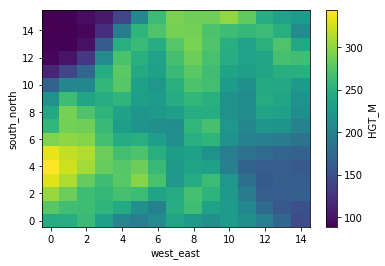

In [5]:
geogrid.HGT_M.plot()

**Plot the LU_INDEX variable, the dominant land-use class index for each grid cell**

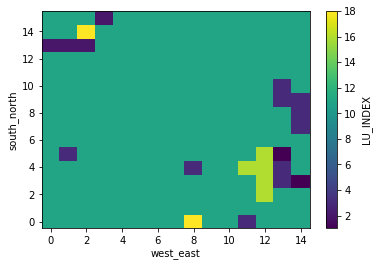

In [6]:
geogrid.LU_INDEX.plot()

### 2-d Spatial with no temporal component
Now we will plot a timeseries from multiple netcdf files using the `open_mfdataset` command. We will plot a hydrograph at a gage point.



**Open the chanobs multi-file dataset**
We are going to use the `*CHANOBS*` files because it will limit the number of grid cells to only those which we have specified have a gage. We will discuss more about output files in Lesson 4.

**NOTE: `open_mfdataset` supports wildcards for pattern matching but requires that the path be absolute with no tilde**

We will use wildcards `*` to open all files that contain 'CHANOBS' in the name.

**NOTE: Because we are opening multiple files, we need to tell xarray how to concatenate them. Because this is a timeseries with time dimension called 'time' we will specify 'time' as the concatenation dimension.

In [7]:
chanobs = xr.open_mfdataset('/home/docker/mount/wrf-hydro-training/output/lesson2/run_gridded_default/*CHANOBS*',
                            concat_dim='time')

**Print some info about the file**

In [8]:
chanobs.info()

xarray.Dataset {
dimensions:
	feature_id = 3 ;
	reference_time = 1 ;
	time = 168 ;

variables:
	datetime64[ns] reference_time(reference_time) ;
		reference_time:long_name = model initialization time ;
		reference_time:standard_name = forecast_reference_time ;
	int32 feature_id(feature_id) ;
		feature_id:long_name = User Specified Forecast Points ;
		feature_id:comment = Forecast Points Specified in Geogrid file ;
		feature_id:cf_role = timeseries_id ;
	float32 latitude(feature_id) ;
		latitude:long_name = Feature latitude ;
		latitude:standard_name = latitude ;
		latitude:units = degrees_north ;
	float32 longitude(feature_id) ;
		longitude:long_name = Feature longitude ;
		longitude:standard_name = longitude ;
		longitude:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:long_name = valid output time ;
		time:standard_name = time ;
	|S1 crs(time) ;
		crs:transform_name = latitude longitude ;
		crs:grid_mapping_name = latitude longitude ;
		crs:esri_pe_string = GEOGCS["GCS_WGS_

Here we can see that we have a time dimension of length 168 corresponding to the 168 hourly output files of our simulation.

**Plot a hydrograph for 1 gage point**
Now we will select 1 gage from the dataset and plot our streamflow variable. For more information on indexing and selecting data with xarray see the [xarray documentation](http://xarray.pydata.org/en/stable/)

In [9]:
chanobs.feature_id.load()

<xarray.DataArray 'feature_id' (feature_id: 3)>
array([3, 2, 1], dtype=int32)
Coordinates:
  * feature_id  (feature_id) int32 3 2 1
    latitude    (feature_id) float32 41.410416 41.449097 41.465546
    longitude   (feature_id) float32 -73.69508 -73.73784 -73.75716
Attributes:
    long_name:  User Specified Forecast Points
    comment:    Forecast Points Specified in Geogrid file
    cf_role:    timeseries_id

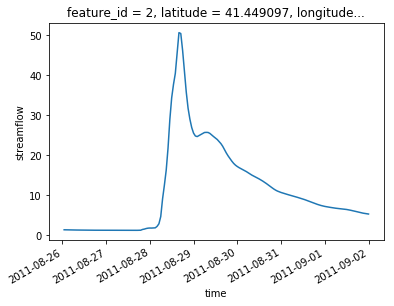

In [10]:
chanobs.sel(feature_id = 2).streamflow.plot()

# Next up - Run-time options
This concludes lesson 3. In the next lesson we will discuss run-time options and experiment with different options and viewing the effect on the model behavoir using xarray.